In [16]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
paris_data = pd.read_csv("Data/full_paris_emolex.csv")
gnd_data = pd.read_csv("Data/full_gnd_emolex.csv")

In [11]:
paris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67866 entries, 0 to 67865
Data columns (total 19 columns):
id_str            67866 non-null int64
created_at        67866 non-null object
full_text         67866 non-null object
retweet_count     67866 non-null int64
favorite_count    67866 non-null int64
user_id           67866 non-null int64
screen_name       67866 non-null object
name              67864 non-null object
location          54758 non-null object
negative          67866 non-null float64
positive          67866 non-null float64
anger             67866 non-null float64
anticipation      67866 non-null float64
disgust           67866 non-null float64
fear              67866 non-null float64
joy               67866 non-null float64
sadness           67866 non-null float64
surprise          67866 non-null float64
trust             67866 non-null float64
dtypes: float64(10), int64(4), object(5)
memory usage: 9.8+ MB


In [37]:
emotions = ["positive", "negative", "anger", "anticipation", "disgust", "fear", "joy", "sadness", "surprise", "trust"]

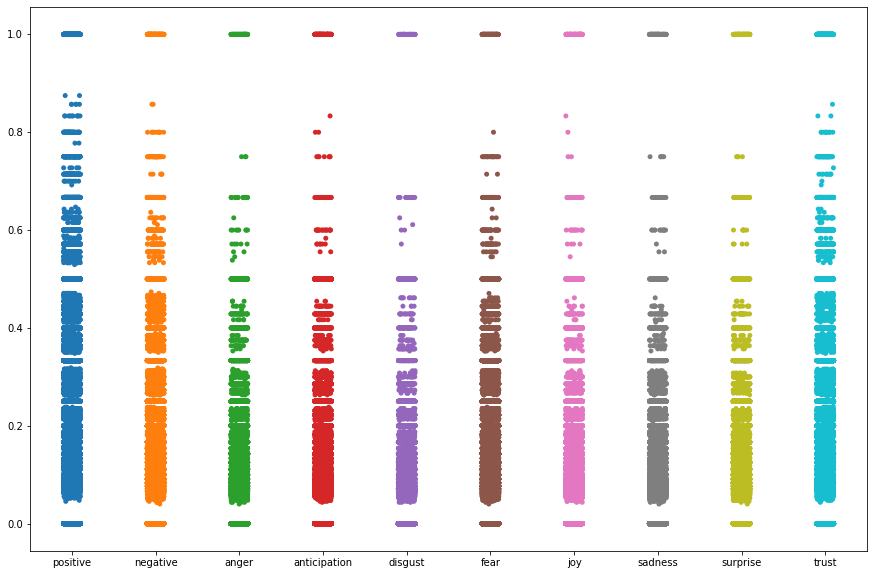

In [17]:
plt.figure(figsize=(15,10))
sns.stripplot(data = paris_data[emotions])
plt.show()

In [ ]:
#Add bar chart of averages

In [9]:
vec = TfidfVectorizer(norm='l1', max_features = 10000) #best way to do this?
matrix = matrix = vec.fit_transform(paris_data['full_text'])
vocab = vec.get_feature_names()

In [10]:
vocab_df = pd.DataFrame(matrix.toarray(), columns=vocab)
vocab_df.head()

,00,000,04,05,06,08,09,0n2geflmhd,10,100,...,être,último,über,œuvre,για,на,по,पर,கள,லந
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
paris_topic_2 = ["energy", "oneplanetsummit", "emission", "finance", "adaptation", "mitigation", "party", "response"]
paris_data["topic_2"] = vocab_df[paris_topic_2].sum(axis = 1)
paris_data["topic_2"] = paris_data["topic_2"].apply(lambda x: 1 if x > 0 else 0)
paris_data["topic_2"].sum()

7172

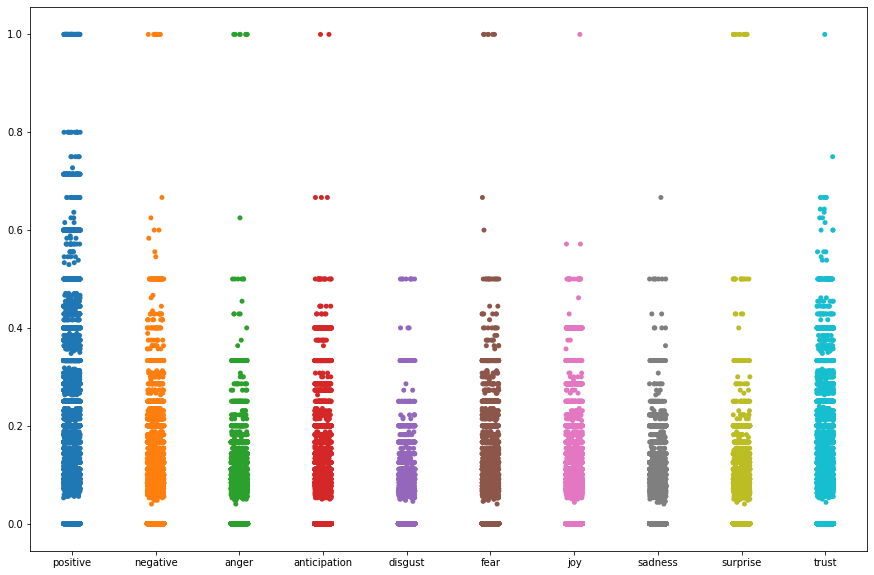

In [38]:
plt.figure(figsize=(15,10))
paris_topic2 = paris_data[paris_data["topic_2"] == 1]
sns.stripplot(data = paris_topic2[emotions])
plt.show()

In [39]:
paris_topic_3 = ["commitment", "leadership", "historic", "community", "implementation", "sustainable", "investor", "anniversary"]
paris_data["topic_3"] = vocab_df[paris_topic_3].sum(axis = 1)
paris_data["topic_3"] = paris_data["topic_3"].apply(lambda x: 1 if x > 0 else 0)
paris_data["topic_3"].sum()

4164

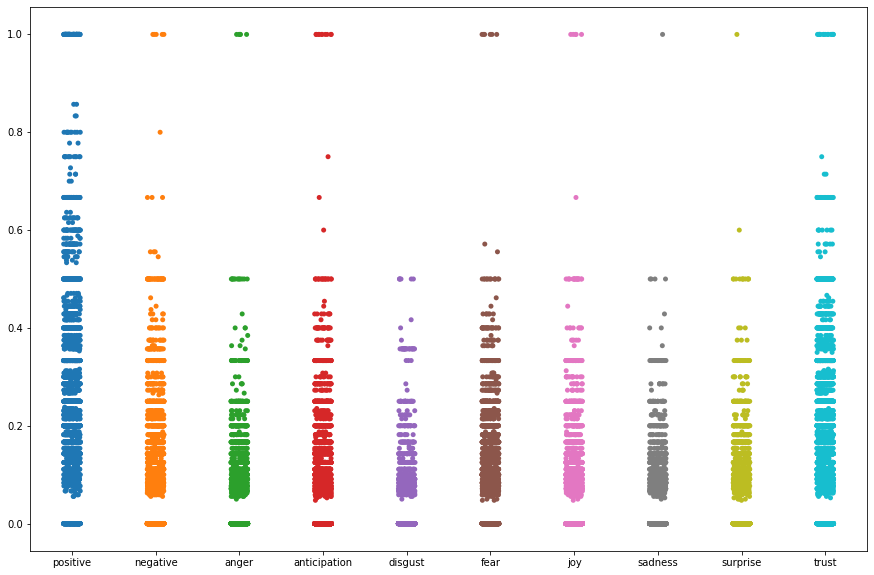

In [40]:
plt.figure(figsize=(15,10))
paris_topic3 = paris_data[paris_data["topic_3"] == 1]
sns.stripplot(data = paris_topic3[emotions])
plt.show()

In [58]:
def plot_trend(chart_title, sentiment_sdf, emotions, rolling_window=90):

    
    emotions = ["positive", "negative"]
    trend_pdf = sentiment_sdf[["created_at"] + emotions]
    trend_pdf = trend_pdf.sort_values(by = "created_at")
    
    fig, ax = plt.subplots(figsize=(25,10), sharex=True)
    fig.suptitle('{}'.format(chart_title))
#     ax0 = plt.subplot(111)
    for emotion in emotions:
        rolling = trend_pdf[emotion].rolling(window=rolling_window).mean()
        ax.plot(trend_pdf.created_at, rolling, label=emotion)


#     rolling_pos = trend_pdf.pos_avg.rolling(window=rolling_window).mean()
#     rolling_neg = trend_pdf.neg_avg.rolling(window = rolling_window).mean()
#     rolling_tweets = trend_pdf.num_tweets.rolling(window=rolling_window).mean()

    
    
#     ax1 = ax0.twinx()

#     ax0.plot(trend_pdf.date, rolling_neg, label = 'negative')
    ax.legend(loc='upper left')
#     ax1.plot(trend_pdf.date, rolling_tweets, label='tweets', c='k')
#     ax1.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

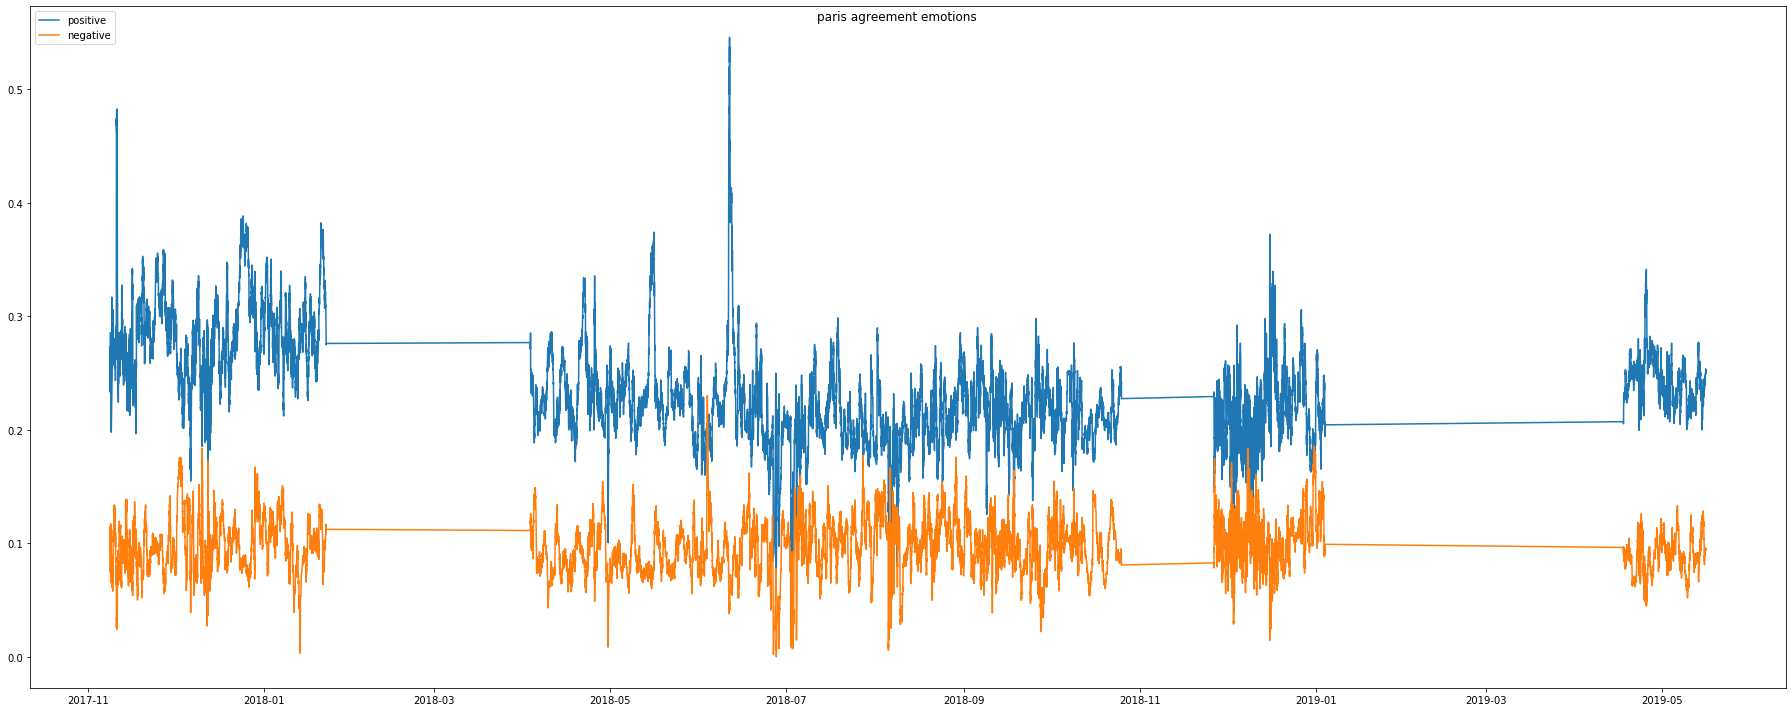

In [59]:
paris_data["created_at"] = pd.to_datetime(paris_data["created_at"])
plot_trend("paris agreement emotions", paris_data, emotions)

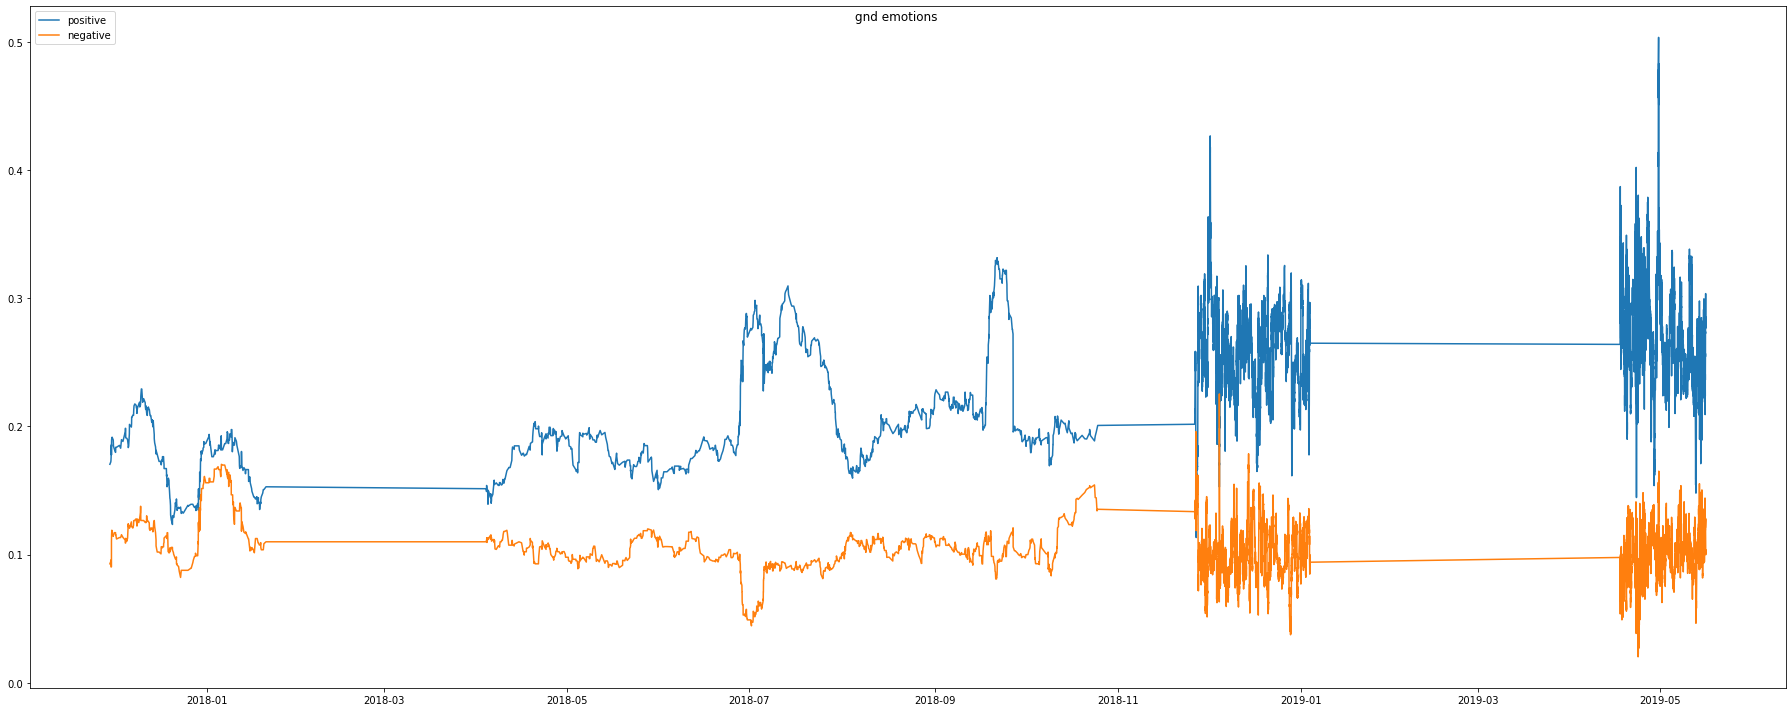

In [60]:
gnd_data["created_at"] = pd.to_datetime(gnd_data["created_at"])
plot_trend("gnd emotions", gnd_data, emotions)